# Homework 6 (more of a tutorial, really)

As I was browsing through Kaggle the other day, I came upon a brand new dataset from the University of Puerto Rico, which contains images of bees entering their hive.  The task is to determine automatically which bees are carrying pollen.  Your job will be to develop a convolutional neural network that performs this task.  

## 1. Load Data (0 pts)

First, we need to load the bee data, which is included along with this homework.  Fortunately, the authors of the Kaggle dataset provided a nice set of files which will do this for us, which I have reproduced below

In [1]:
import glob, os 
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
path="images/"
imlist= glob.glob(os.path.join(path, '*.jpg'))

In [3]:
def dataset(file_list,size=(300,180),flattened=False):
    data = []
    for i, file in enumerate(file_list):
        image = io.imread(file)
        image = transform.resize(image, size, mode='constant')
        if flattened:
            image = image.flatten()

        data.append(image)

    labels = [1 if f.split("/")[-1][0] == 'P' else 0 for f in file_list]

    return np.array(data), np.array(labels)

In [4]:
# Load the dataset (may take a few seconds)
X,y=dataset(imlist)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [5]:
# X has the following structure: X[imageid, y,x,channel]
print('X: ',X.shape)  # data
print('y: ',y.shape)  # target

print('Class 0: ',sum(y==0))
print('Class 1: ',sum(y==1))
print('Total  : ',len(y))

X:  (714, 300, 180, 3)
y:  (714,)
Class 0:  345
Class 1:  369
Total  :  714


We can plot a couple of the images below.  If you check out a couple of these, you will see that the visible difference when bees carry pollen is the presence of large fluffy balls of pollen on their back legs.

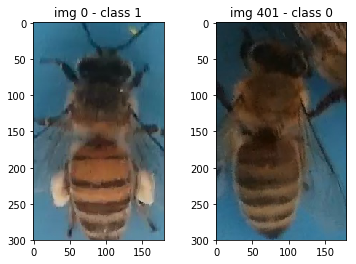

In [6]:
fig, axes = plt.subplots(1,2)
k=0
plt.sca(axes[0])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]))

k=401
plt.sca(axes[1])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]));

## 2. A convolutional network architecture for bee classification (40 pts)

**Implement a 2D convolutional neural network using Keras.  You are free to choose whatever network architecture you like.**

You can find all the relevant syntax for implementing such a network [here](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py), the Keras convnet example for MNIST.

*(For the sake of comparison, I will share the one that I used:*

Layer 1: 5x5 convolution layer with 24 kernels and a relu activation function

Layer 2: 4x4 Max-pooling layer

Layer 3: 5x5 convolution layer with 24 kernels and a relu activation function

Layer 4: 4x4 Max-pooling layer

Layer 5: 5x5 convolution layer with 24 kernels and a relu activation function

Layer 6: 4x4 Max-pooling layer

Layer 7: Flattening layer

Layer 8: Dropout layer with 0.2 dropout probability

Layer 9: 1 node sigmoid layer


In [7]:
import keras
import keras.models as km
import keras.layers as kl

from keras.layers import Conv2D, Dropout, MaxPooling2D, Input, Dense, Flatten
from keras.models import Model

import numpy as np

input_shape = ((300,180,3))

model = km.Sequential()
#! Add layers to your convolutional neural network   
## Regenerating the implementation above
model.add(Conv2D(24, (5, 5), activation='relu')) #1
model.add(MaxPooling2D(pool_size=(4, 4)))        #2

model.add(Conv2D(24, (5, 5), activation='relu')) #3
model.add(MaxPooling2D(pool_size=(4, 4)))        #4

model.add(Conv2D(24, (5, 5), activation='relu')) #5
model.add(MaxPooling2D(pool_size=(4, 4)))        #6

model.add(Flatten())                             #7

model.add(Dropout(0.2))                          #8

model.add(Dense(1, activation='sigmoid'))        #9

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 3. Fitting the CNN to data (20 pts)

Compile your model, using a binary crossentropy loss function and an optimizer of your choosing (RMSprop worked well for me).  Select a batch size and number of epochs, and fit your model to the training data, while also keeping track of the test set accuracy.

**Plot the training and test accuracy of your model at each epoch.  Comment on whether you think the model is being overfit.**

Train on 571 samples, validate on 143 samples
Epoch 1/18
571/571 [==============================] - 22s 39ms/step - loss: 0.6884 - acc: 0.5622 - val_loss: 0.6510 - val_acc: 0.7483
Epoch 2/18
571/571 [==============================] - 20s 36ms/step - loss: 0.6598 - acc: 0.6375 - val_loss: 0.6136 - val_acc: 0.7343
Epoch 3/18
571/571 [==============================] - 21s 37ms/step - loss: 0.6091 - acc: 0.6743 - val_loss: 0.5773 - val_acc: 0.7762
Epoch 4/18
571/571 [==============================] - 24s 41ms/step - loss: 0.5237 - acc: 0.7671 - val_loss: 0.7392 - val_acc: 0.5664
Epoch 5/18
571/571 [==============================] - 21s 37ms/step - loss: 0.5112 - acc: 0.7461 - val_loss: 0.5080 - val_acc: 0.7972
Epoch 6/18
571/571 [==============================] - 33s 57ms/step - loss: 0.4494 - acc: 0.8231 - val_loss: 0.7162 - val_acc: 0.6084
Epoch 7/18
571/571 [==============================] - 20s 36ms/step - loss: 0.4421 - acc: 0.8039 - val_loss: 0.5132 - val_acc: 0.7273
Epoch 8/18
571/5

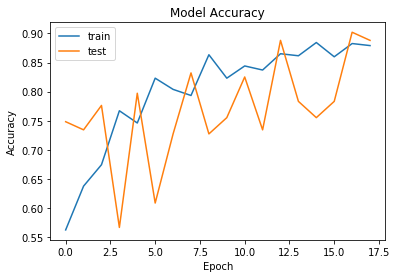

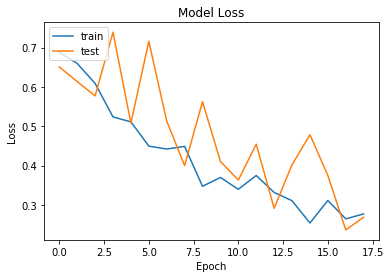

In [8]:
model.compile(loss=keras.losses.binary_crossentropy,                #! Specify a loss function
              optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),           #! Specify an optimizer
              metrics=['accuracy'])

batch_size = 50                       #! Specify a batch size
epochs= 18                            #! Specify an epoch  
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test,y_test))

#! Plot test and training accuracy (note that the history.history object is a dictionary containing relevant info)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## 4. Model evaluation (20 pts)

Now that you have a trained model, make a prediction for the test set (model.predict is a useful function for this).  **Compute and display a confusion matrix.  Select and display an example from the test set of a true positive, a true negative, a false positive, and a false negative.  Speculate on the reasons behind misclassification for images that your model predicted incorrectly**.

In [9]:
# #coding:utf-8
# import numpy as np
# import tensorflow as tf
# import prettytensor as pt
# from matplotlib import pyplot as plt
# from tensorflow.examples.tutorials.mnist import input_data
# import os
# import time
# from datetime import timedelta
from sklearn.metrics import confusion_matrix
import math

my_predictions = model.predict(X_test)

for i in range(len(my_predictions)):
    if my_predictions[i] > .5:
        my_predictions[i] = 1
    else:
        my_predictions[i] = 0

my_confusion_matrix = confusion_matrix(my_predictions, y_test)
print(my_confusion_matrix)

[[61  2]
 [14 66]]


In [10]:
my_true_positives = []
my_false_positives = []
my_true_negatives = []
my_false_negatives = []

for i in range(len(my_predictions)):
    if my_predictions[i] == y_test[i] and my_predictions[i] == 1:
        my_true_positives.append(X_test[i])
        
    elif my_predictions[i] != y_test[i] and my_predictions[i] == 1:
        my_false_positives.append(X_test[i])
    
    elif my_predictions[i] == y_test[i] and my_predictions[i] == 0:
        my_true_negatives.append(X_test[i])
        
    elif my_predictions[i] != y_test[i] and my_predictions[i] == 0:
        my_false_negatives.append(X_test[i])
        

66 True Positive Examples
14 False Positive Examples
61 True Negative Examples
2 False Negative Examples


Text(0.5,1,'False Negative')

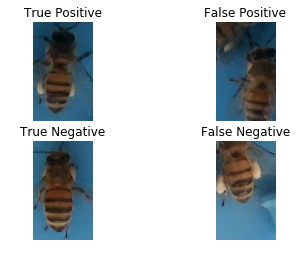

In [31]:
print(len(my_true_positives), 'True Positive Examples')
print(len(my_false_positives), 'False Positive Examples')
print(len(my_true_negatives), 'True Negative Examples')
print(len(my_false_negatives), 'False Negative Examples')

fig,axs = plt.subplots(nrows=2,ncols=2)

# for i,ax in enumerate(axs):
ax1 = axs[0, 0]
ax1.imshow(my_true_positives[0])
ax1.axis('off')
ax1.set_title('True Positive')

ax2 = axs[0, 1]
ax2.imshow(my_false_positives[13])
ax2.axis('off')
ax2.set_title('False Positive')

ax3 = axs[1, 0]
ax3.imshow(my_true_negatives[0])
ax3.axis('off')
ax3.set_title('True Negative')

ax4 = axs[1, 1]
ax4.imshow(my_false_negatives[0])
ax4.axis('off')
ax4.set_title('False Negative')
    
    

With the false positive identified above it appears that there is multiple bees in the same pictures. I assume that this played a part in the misclassification. It also does look to me like the bee that it is the top portion of the picture may actually have pollen. In the case for the false negative, the bee is not in the center of the image. This may have played a part in the misclassification. If the pollen is not in the spot where it is predicted to be it may throw off the prediction. Below I printed out all of the False examples because I was curious...

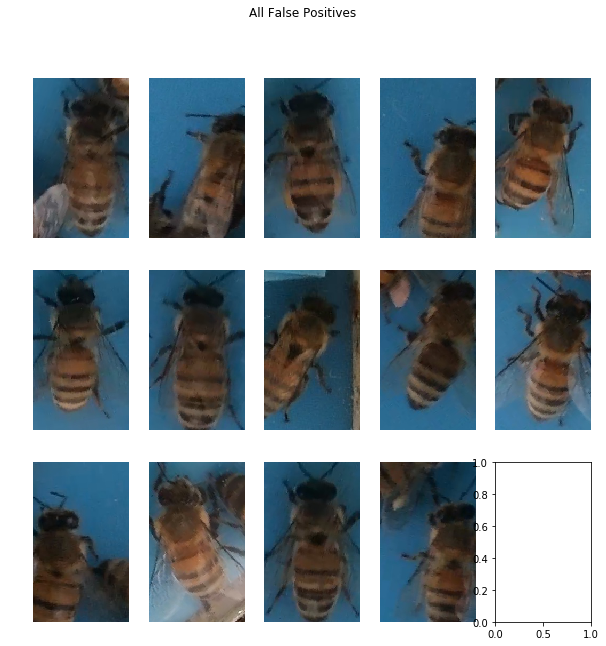

In [27]:
columns = 5
fig,axs = plt.subplots(nrows=3,ncols=columns)
fig.set_size_inches(10,10)
fig.suptitle('All False Positives')

length = len(my_false_positives)

for i in range(length):
    if i < 5:
        ax1 = axs[0,i]
        ax1.imshow(my_false_positives[i])
        ax1.axis('off')
    elif i >= 5 and i < 10:
        ax2 = axs[1,i-5]
        ax2.imshow(my_false_positives[i])
        ax2.axis('off')
    elif i >= 10 and i < 15:
        ax3 = axs[2,i-10]
        ax3.imshow(my_false_positives[i])
        ax3.axis('off')
    elif i >= 15 and i <= 21:
        ax4 = axs[3,i-15]
        ax4.imshow(my_false_positives[i])
        ax4.axis('off')
        
        

There is an isue with position on a lot of these. To me this indicates that there must be something influencing the prediction. Maybe the color from a bees stripe was in a position where pollen usually is and this created the mistake.

(-0.5, 179.5, 299.5, -0.5)

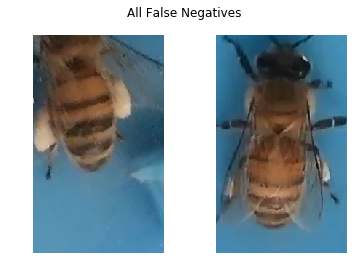

In [30]:
#length = len(my_false_negatives)
fig = plt.figure()
fig.suptitle('All False Negatives')

ax = fig.add_subplot(1,2,1)
ax.imshow(my_false_negatives[0])
ax.axis('off')

ax = fig.add_subplot(1,2,2)
ax.imshow(my_false_negatives[1])
ax.axis('off')

The first picture here is the case explained above. In the second case I suspect that the pollen is very small and also lined up with an edge of the wings may be playing a part in the misclassification. 